In [1]:
%matplotlib inline

import json
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
def collect(path, version):
    with open(path) as f:
        for line in f:
            record = json.loads(line)
            record['version'] = version
            yield record
            
ba12 = list(collect('data/ba_perf.12.json', '1.4.12'))
ba13 = list(collect('data/ba_perf.13.json', '1.4.13'))
ba13_1 = list(collect('data/ba_perf.13.1.json', '1.4.13.1'))
len(ba12)

455

In [3]:
from pandas.io.json import json_normalize
ba12_data = json_normalize(ba12)
ba13_data = json_normalize(ba13)
ba13_1_data = json_normalize(ba13_1)
all = pd.concat([ba12_data, ba13_data, ba13_1_data], axis=0)
len(all)

1355

In [4]:
all

,_id,app,browser,cell,code,createdAt.$date,dataset,events,extra.app,extra.browser,...,extra.type,extra.url,isNew,language,requestId,totalDuration,type,url,username,version
0,25b2g58zkvvTJ3u4R,NaN,NaN,NaN,NaN,1459549202506,NaN,"[{u'timestamp': 1459549236874, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://52.87.229.223/narratives/Sy7tgCpLSxFivi...,NaN,NaN,NaN,45,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12
1,2Gh3QMkMqExeQDoC9,NaN,NaN,NaN,NaN,1459549349940,NaN,"[{u'timestamp': 1459549384332, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,NaN,http://52.87.229.223/narratives/Sy7tgCpLSxFivi...,NaN,NaN,NaN,22,narratives-sq-suggestion,NaN,testbot@adatao.com,1.4.12
2,2HTMLnkwx3G6PEg7g,NaN,NaN,NaN,NaN,1459547853067,NaN,"[{u'timestamp': 1459547854865, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,...,NaN,http://52.87.229.223/narratives,NaN,NaN,NaN,1,upload-preview-data,NaN,testbot@adatao.com,1.4.12
3,2P3HjS3qBHQ7n4nKa,NaN,NaN,NaN,NaN,1459548596330,NaN,"[{u'timestamp': 1459548630726, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://52.87.229.223/narratives/5hEw4aTaGxRPmC...,NaN,NaN,NaN,9,sq-autosuggest,NaN,testbot@adatao.com,1.4.12
4,2TkiW2PWgBMXsJ6n5,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,5hEw4aTaGxRPmCbeB-2fd513e9-3d63-4c4a-b264-db22...,show relationship between sales and rank,1459548353554,forbes,"[{u'timestamp': 1459548387238, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,453adfad-d4c5-4f2e-bdb0-8fd1355dbb8a,718,cell-execution,http://52.87.229.223/narratives/5hEw4aTaGxRPmC...,NaN,1.4.12
5,2W3S7QCN547PnXbND,NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Sy7tgCpLSxFiviS5t-945a4714-81a5-4908-89c7-6062...,show monthly avgdailypoints by firstsynctime,1459549360038,activity20,"[{u'timestamp': 1459549392740, u'event': u'cel...",NaN,NaN,...,NaN,NaN,True,NLP,79fba508-805f-471b-b211-04c8c8ba6e0d,1712,cell-execution,http://52.87.229.223/narratives/Sy7tgCpLSxFivi...,NaN,1.4.12
6,2gfM4W2ZGNQAySpmk,DASHBOARD,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,sxtp9aT7cp7qDrnRh-95db20d6-4569-47f2-b20e-1ad7...,top company by profits,1459549457068,forbes,"[{u'timestamp': 1459549490881, u'event': u'exe...",NaN,NaN,...,NaN,NaN,False,NLP,d632ecc5-4206-4214-a111-78e3611ffd92,601,cell-execution,http://52.87.229.223/dashboards/sxtp9aT7cp7qDr...,NaN,1.4.12
7,2nbRmxshZY9gaXRxP,NaN,NaN,NaN,NaN,1459549374096,NaN,"[{u'timestamp': 1459549408502, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://52.87.229.223/narratives/Sy7tgCpLSxFivi...,NaN,NaN,NaN,9,sq-autosuggest,NaN,testbot@adatao.com,1.4.12
8,2pA7SjFX3bGjBy6ig,NaN,NaN,NaN,NaN,1459549421862,NaN,"[{u'timestamp': 1459549456261, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://52.87.229.223/narratives/Sy7tgCpLSxFivi...,NaN,NaN,NaN,16,sq-autosuggest,NaN,testbot@adatao.com,1.4.12
9,2vaXjAgpSg4cv2xjm,NaN,NaN,NaN,NaN,1459549225973,NaN,"[{u'timestamp': 1459549260378, u'event': u'sta...",NARRATIVES,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,...,typeahead,http://52.87.229.223/narratives/Sy7tgCpLSxFivi...,NaN,NaN,NaN,8,sq-autosuggest,NaN,testbot@adatao.com,1.4.12


In [5]:
cell_exec = all[(all['type'] == 'cell-execution') & (all['extra.numFilters'] == 0)]
len(cell_exec)

222

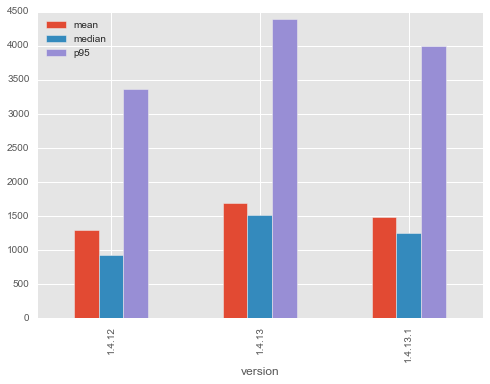

In [12]:
def p95(arr):
    return np.percentile(arr, 95)

cell_exec.groupby('version').agg([np.mean, np.median, p95])['totalDuration'].plot.bar()

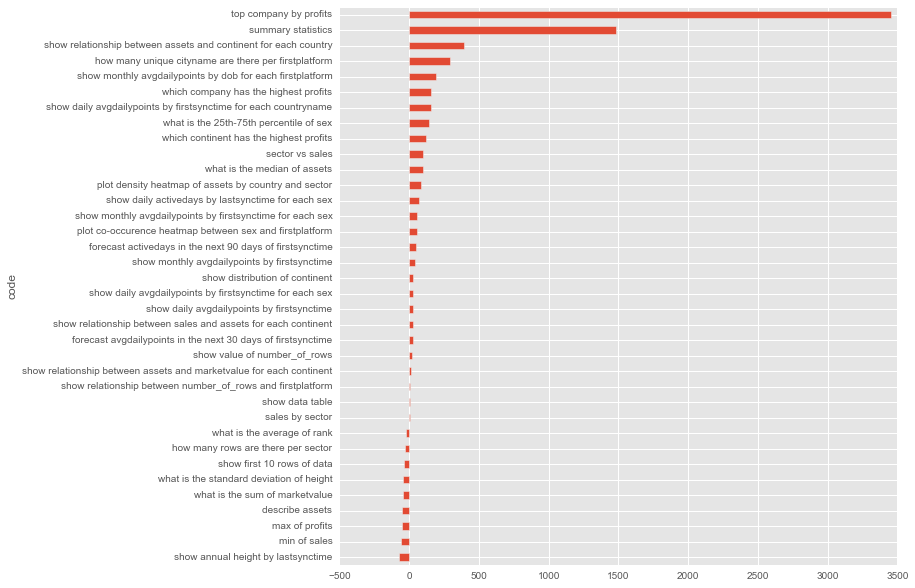

In [42]:
v12_mean = cell_exec[cell_exec['version'] == '1.4.12'].groupby('code').agg({'totalDuration': np.mean})
v13_1_mean = cell_exec[cell_exec['version'] == '1.4.13.1'].groupby('code').agg({'totalDuration': np.mean})

mean_diff = v13_1_mean['totalDuration'] - v12_mean['totalDuration']
plt.figure(figsize=(10,10))
mean_diff.sort_values().plot.barh()